In [41]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import zscore

Matplotlib is building the font cache; this may take a moment.


In [29]:
csv_file_path = "weatherHistory.csv"
dataset = pd.read_csv(csv_file_path)
dataset = dataset[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)']]
print(dataset.head())

   Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0         9.472222      0.89            14.1197                   251.0   
1         9.355556      0.86            14.2646                   259.0   
2         9.377778      0.89             3.9284                   204.0   
3         8.288889      0.83            14.1036                   269.0   
4         8.755556      0.83            11.0446                   259.0   

   Visibility (km)  
0          15.8263  
1          15.8263  
2          14.9569  
3          15.8263  
4          15.8263  


In [30]:
dataset.columns = dataset.columns.str.strip()  # Strip any leading/trailing whitespace from headers
dataset['Temperature (C)'] = dataset['Temperature (C)'].astype(float).round(2)
dataset['Humidity'] = dataset['Humidity'].astype(str).str.replace(',', '.').astype(float).round(2)
dataset['Wind Speed (km/h)'] = dataset['Wind Speed (km/h)'].astype(float).round(2)
dataset['Wind Bearing (degrees)'] = dataset['Wind Bearing (degrees)'].astype(float).round(2)
dataset['Visibility (km)'] = dataset['Visibility (km)'].astype(float).round(2)
print(dataset.head())

   Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0             9.47      0.89              14.12                   251.0   
1             9.36      0.86              14.26                   259.0   
2             9.38      0.89               3.93                   204.0   
3             8.29      0.83              14.10                   269.0   
4             8.76      0.83              11.04                   259.0   

   Visibility (km)  
0            15.83  
1            15.83  
2            14.96  
3            15.83  
4            15.83  


In [31]:
# Select relevant features for temperature prediction
features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)']
target = 'Temperature (C)'

In [32]:
# Normalize the independent variables using Z-score normalization
train_data = dataset[features]
train_data_normalized = (train_data - train_data.mean()) / train_data.std()
train_target = dataset[target]

In [33]:
# Slovin's formula for sample size calculation
degree = 0.01  # margin of error
N = len(dataset)
n = math.ceil(N / (1 + N * (degree ** 2)))
k = N // n
print("total sample:", k)
print("data on each sample:", n)

total sample: 10
data on each sample: 9061


In [34]:
# Split the data into k parts
x_splits = np.array_split(train_data_normalized, k)
y_splits = np.array_split(train_target, k)

/Users/naufalasr/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/naufalasr/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Sample #1 - RMSE: 6.801, R-squared: -0.13, Total Data: 2412
Regression Model: Y = 12.022 + -5.982 * X1 + -1.944 * X2 + 0.416 * X3 + 2.618 * X4


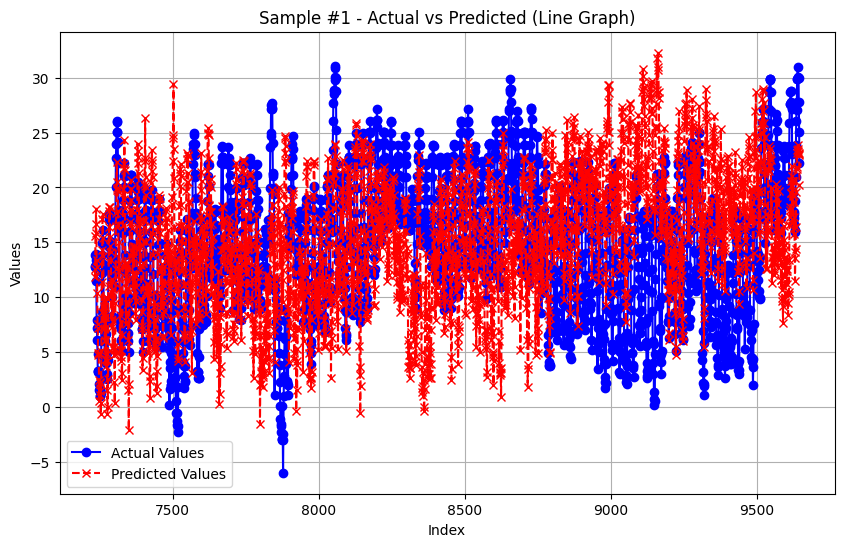

Sample #2 - RMSE: 5.016, R-squared: 0.562, Total Data: 2412
Regression Model: Y = 10.713 + -7.49 * X1 + -1.403 * X2 + 0.173 * X3 + 1.247 * X4


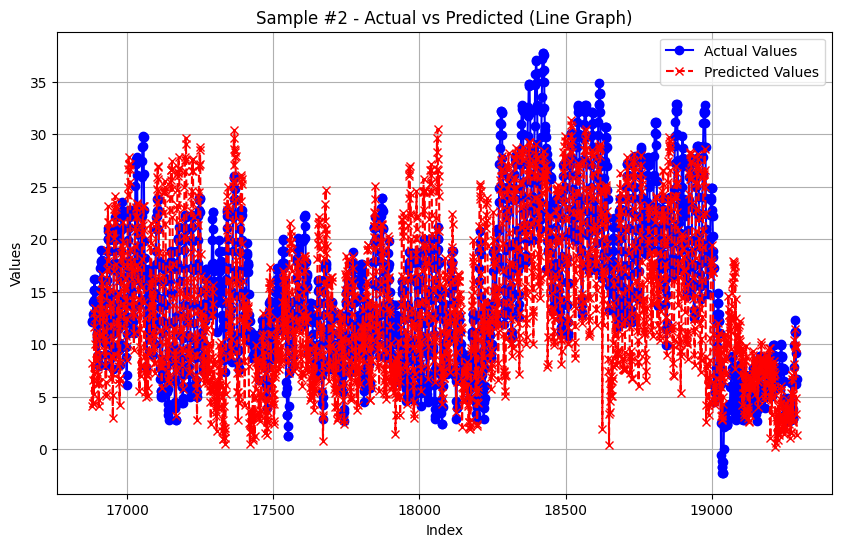

Sample #3 - RMSE: 7.32, R-squared: 0.548, Total Data: 2412
Regression Model: Y = 10.839 + -6.087 * X1 + -1.611 * X2 + 0.127 * X3 + 1.47 * X4


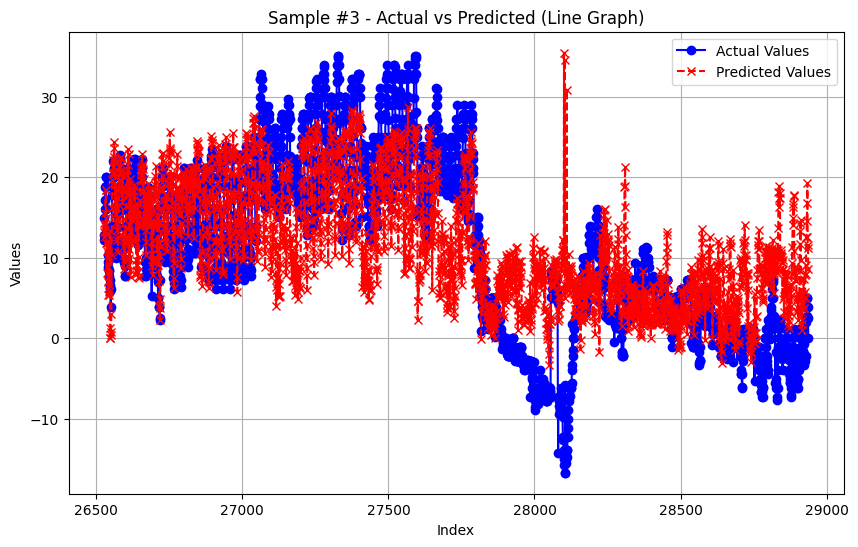

Sample #4 - RMSE: 9.129, R-squared: 0.04, Total Data: 2412
Regression Model: Y = 12.65 + -5.834 * X1 + -1.382 * X2 + -0.014 * X3 + 1.502 * X4


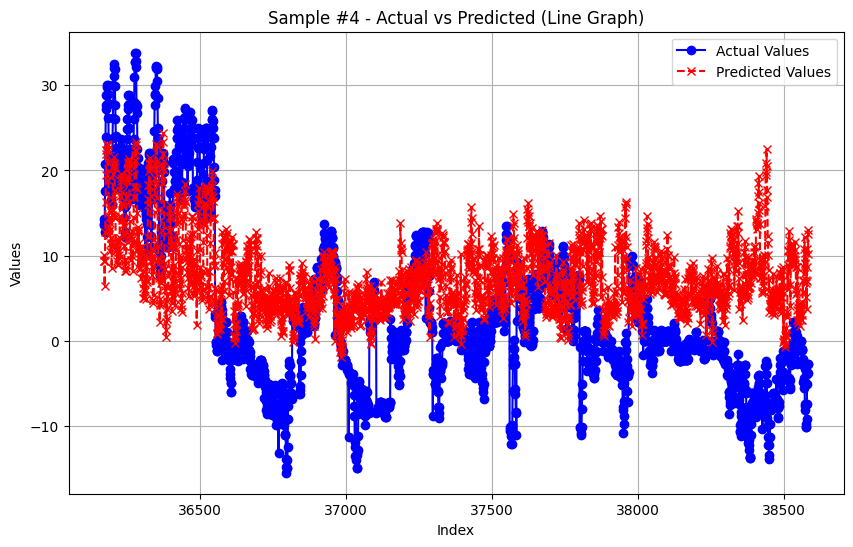

Sample #5 - RMSE: 9.419, R-squared: 0.263, Total Data: 2412
Regression Model: Y = 14.648 + -4.597 * X1 + -1.624 * X2 + 0.149 * X3 + 1.345 * X4


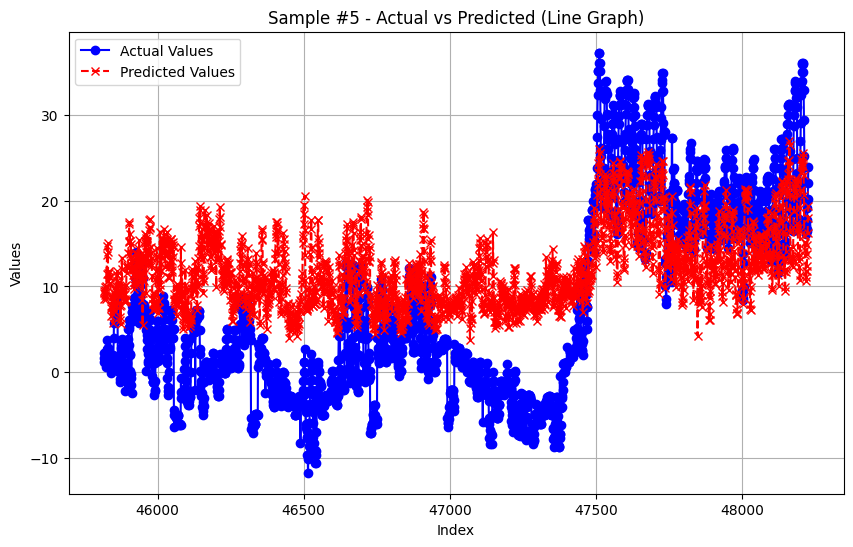

Sample #6 - RMSE: 9.582, R-squared: 0.405, Total Data: 2412
Regression Model: Y = 10.438 + -6.052 * X1 + -1.051 * X2 + 0.54 * X3 + 2.847 * X4


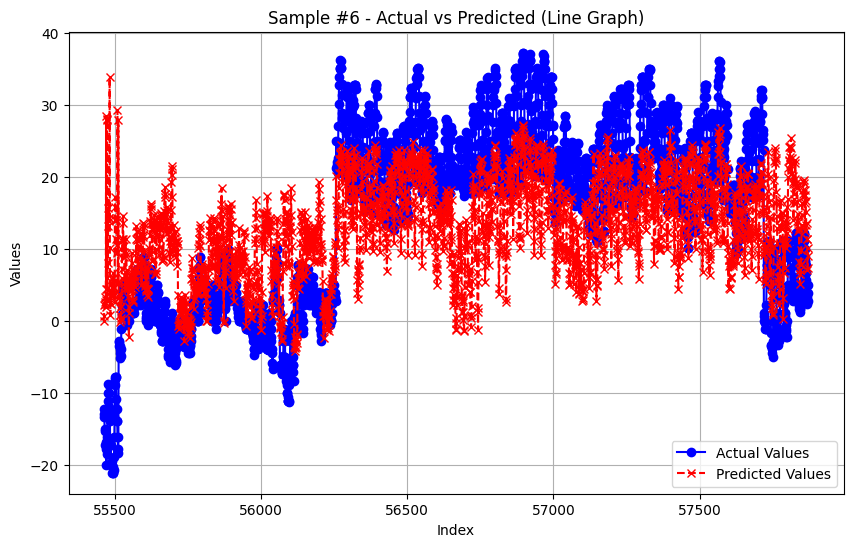

Sample #7 - RMSE: 8.548, R-squared: 0.209, Total Data: 2412
Regression Model: Y = 10.865 + -5.411 * X1 + -0.725 * X2 + 0.137 * X3 + 1.309 * X4


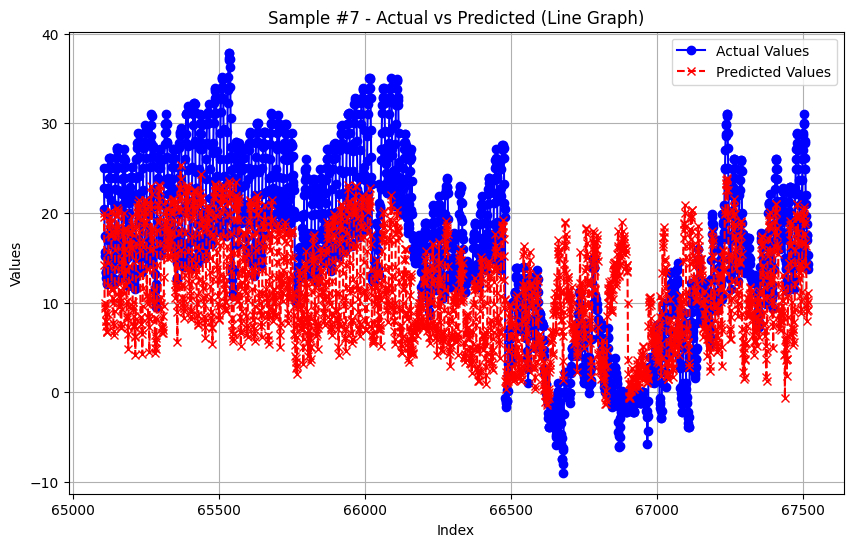

Sample #8 - RMSE: 5.366, R-squared: 0.36, Total Data: 2412
Regression Model: Y = 12.417 + -5.215 * X1 + -1.869 * X2 + 0.665 * X3 + 1.21 * X4


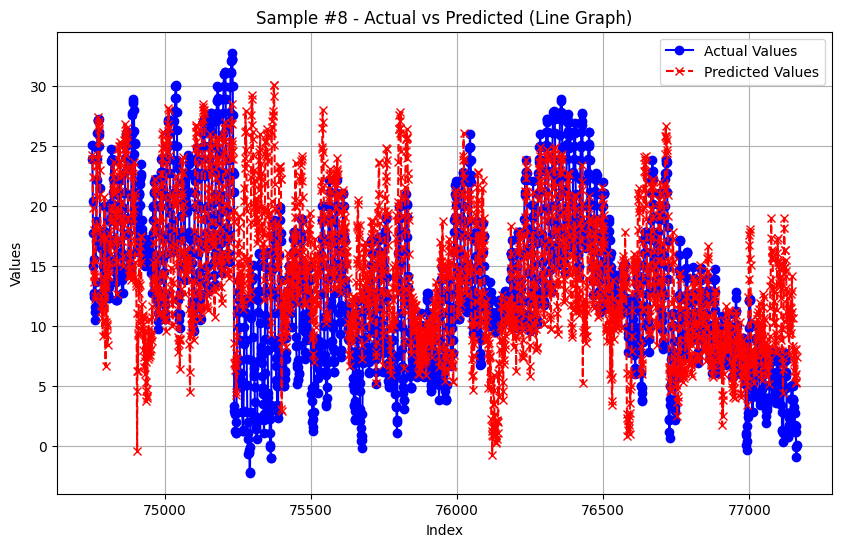

Sample #9 - RMSE: 5.896, R-squared: 0.196, Total Data: 2412
Regression Model: Y = 12.301 + -4.821 * X1 + -1.871 * X2 + 0.095 * X3 + 1.922 * X4


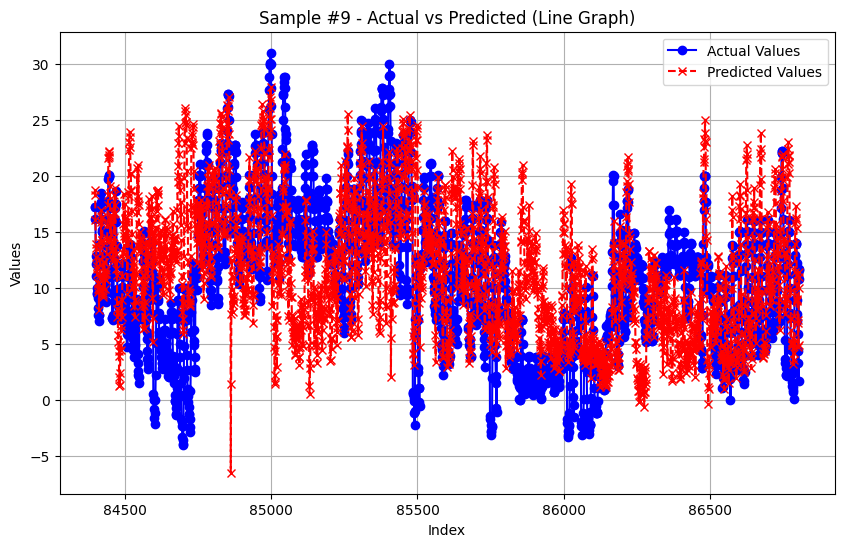

Sample #10 - RMSE: 4.334, R-squared: 0.628, Total Data: 2412
Regression Model: Y = 12.939 + -5.758 * X1 + -1.616 * X2 + 0.493 * X3 + 1.563 * X4


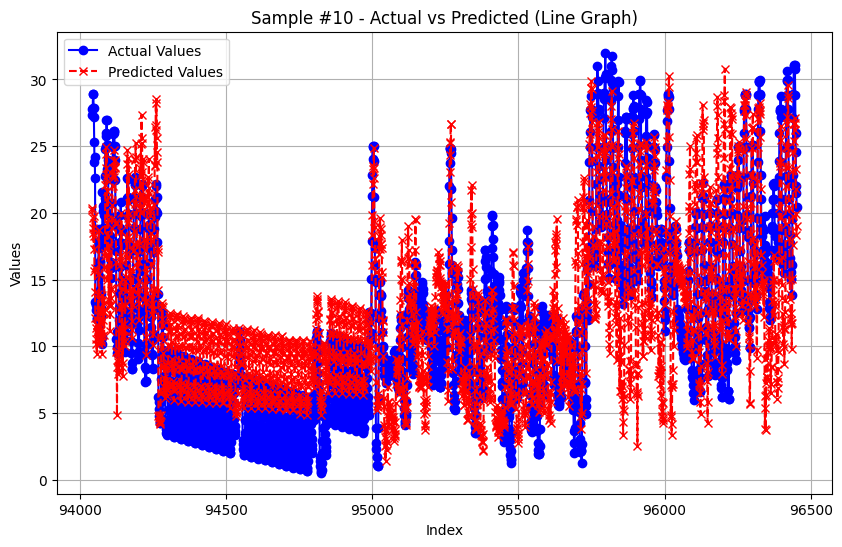

Average RMSE: 7.141
Average R-squared: 0.308


In [47]:
# Initialize lists to store results
rmse_list = []
r2_list = []
coefficients_list = []
results_list = []

# Process each sample
for i in range(k):
    # Divide each split into training (75%) and testing (25%) sets
    x_train, x_test, y_train, y_test = train_test_split(x_splits[i], y_splits[i], test_size=0.25, shuffle=False)
    
    # Train the model
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_predicted = reg.predict(x_test)
    
    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
    r2 = r2_score(y_test, y_predicted)
    
    # Store the results
    rmse_list.append(round(rmse, 3))
    r2_list.append(round(r2, 3))
    
    # Store coefficients and intercept
    coefficients = np.round(np.append(reg.coef_, reg.intercept_), 3)
    coefficients_list.append(coefficients)
    
    # Prepare data for CSV
    results = {
        'Sample': i + 1,
        'RMSE': round(rmse, 3),
        'R-squared': round(r2, 3),
        'Coefficients': coefficients.tolist(), 
    }
    
    # Add actual vs predicted to results
    for actual, predicted in zip(y_test, y_predicted):
        results_list.append({
            'Sample': i + 1,
            'Actual': round(actual, 3),
            'Predicted': round(predicted, 3)
        })
    
    # Print regression model and performance metrics for the sample
    print(f'Sample #{i+1} - RMSE: {round(rmse, 3)}, R-squared: {round(r2, 3)}, Total Data: {len(y_test)}')
    
    # Dynamically create feature names
    feature_names = [f'X{j+1}' for j in range(len(reg.coef_))]
    feature_string = ' + '.join([f'{round(coefficients[j], 3)} * {name}' for j, name in enumerate(feature_names)])
    print(f'Regression Model: Y = {round(coefficients[-1], 3)} + {feature_string}')
    
    # Plot Actual vs Predicted as line graphs
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, marker='o', linestyle='-', color='blue', label='Actual Values')
    plt.plot(y_test.index, y_predicted, marker='x', linestyle='--', color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Sample #{i+1} - Actual vs Predicted (Line Graph)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate and print the average RMSE and R^2 over all samples
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

print(f'Average RMSE: {round(average_rmse, 3)}')
print(f'Average R-squared: {round(average_r2, 3)}')

# Save results to CSV
results_df = pd.DataFrame(results_list)
results_df.to_csv('regression_result.csv', index=False)

In [36]:
# Compute regression model and RMSE for the entire population
x_train, x_test, y_train, y_test = train_test_split(train_data_normalized, train_target, test_size=0.25, shuffle=False)
reg_population = LinearRegression()
reg_population.fit(x_train, y_train)
y_predicted_population = reg_population.predict(x_test)
rmse_population = np.sqrt(mean_squared_error(y_test, y_predicted_population))
r2_population = r2_score(y_test, y_predicted_population)

# Store coefficients and intercept for the population model
coefficients_population = np.round(np.append(reg_population.coef_, reg_population.intercept_), 3)

# Print regression model and performance metrics for the entire population
print(f'Population Model - RMSE: {round(rmse_population, 3)}, R-squared: {round(r2_population, 3)}')
print(f'Population Regression Model: Y = {round(coefficients_population[-1], 3)} + {round(coefficients_population[0], 3)} * X1 + {round(coefficients_population[1], 3)} * X2 + {round(coefficients_population[2], 3)} * X3 + {round(coefficients_population[3], 3)} * X4')

Population Model - RMSE: 6.743, R-squared: 0.427
Population Regression Model: Y = 11.827 + -5.883 * X1 + -1.426 * X2 + 0.35 * X3 + 1.949 * X4
